In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [5]:
# Carregar o CSV com o delimitador correto
df=pd.read_excel(r"C:\Users\Stanislas Michel\OneDrive\Bureau\FGV - Time Series Analysis\Class 1\Data\dados_A521_D_2010-01-01_2025-01-01.xlsx", usecols="A:C",
parse_dates=["DATA"])

# Verificar os nomes das colunas
print(df.columns)


df

Index(['DATA', 'PRECIPITACAO', 'TEMPERATURA'], dtype='object')


,DATA,PRECIPITACAO,TEMPERATURA
0,2010-01-01,32.4,22.2
1,2010-01-02,5.4,24.0
2,2010-01-03,0.0,24.9
3,2010-01-04,0.0,24.4
4,2010-01-05,19.8,23.7
...,...,...,...
5475,2024-12-28,10.8,21.7
5476,2024-12-29,35.2,20.0
5477,2024-12-30,14.0,21.2
5478,2024-12-31,0.2,21.9


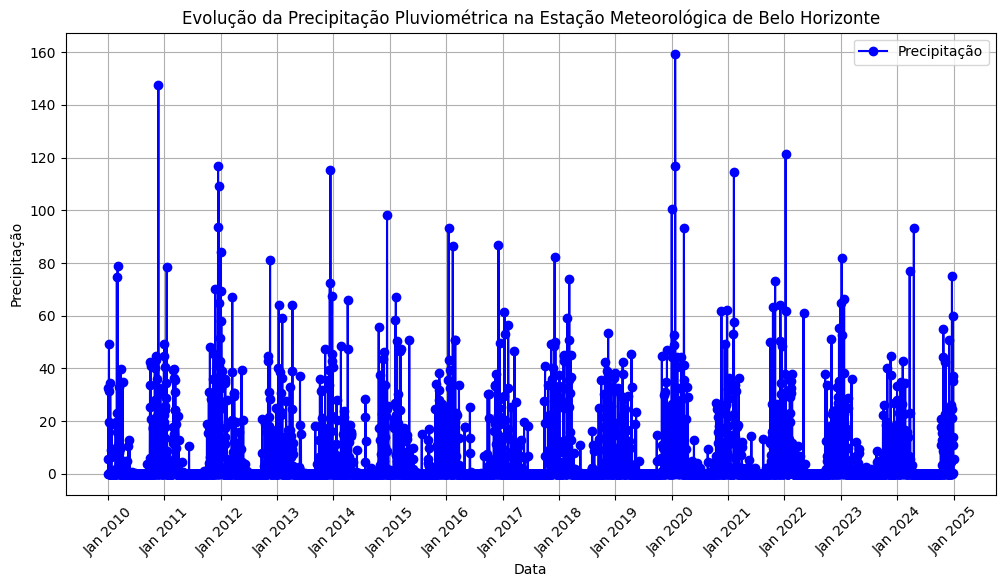

In [4]:
# Renomear colunas para evitar problemas
df.rename(columns=lambda x: x.strip().upper(), inplace=True)

# Certifique-se de que a coluna "DATA" está no formato datetime
df["DATA"] = pd.to_datetime(df["DATA"], dayfirst=True)

# Definir a coluna "DATA" como índice
df.set_index("DATA", inplace=True)

# Criar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["PRECIPITACAO"], marker="o", linestyle="-", color="b", label="Precipitação")

# Configurar rótulos e título
plt.xlabel("Data")
plt.ylabel("Precipitação")
plt.title("Evolução da Precipitação Pluviométrica na Estação Meteorológica de Belo Horizonte")
plt.xticks(rotation=45)

# Configurar rótulos do eixo X para mostrar apenas meses de janeiro
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

# Adicionar legenda e grade
plt.legend()
plt.grid()

# Mostrar o gráfico
plt.show()



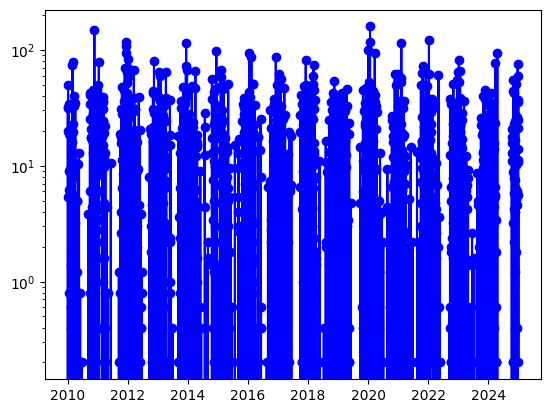

In [5]:
plt.plot(df.index, df["PRECIPITACAO"], marker="o", linestyle="-", color="b", label="PRECIPITACAO") 
plt.yscale('log')  # Set log scale for Y-axis
plt.show()

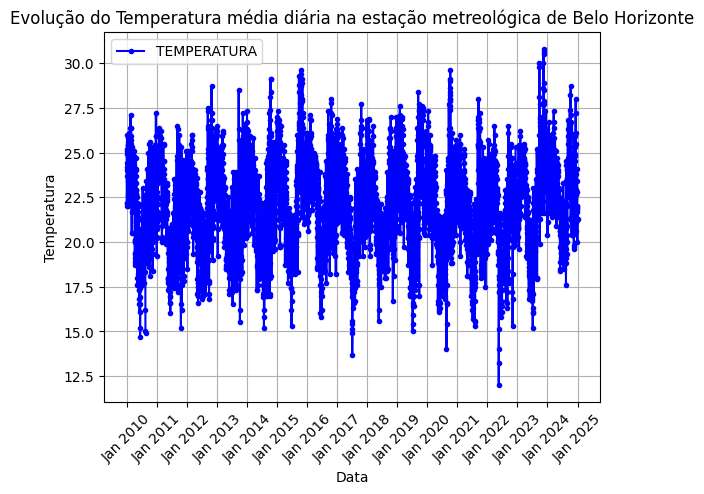

In [6]:
# Criar o gráfico plt.figure(figsize=(12, 6)) 
plt.plot(df.index, df["TEMPERATURA"], marker=".", linestyle="-", color="b", label="TEMPERATURA") 
# Configurar rótulos e título 
plt.xlabel("Data") 
plt.ylabel("Temperatura") 
plt.title("Evolução do Temperatura média diária na estação metreológica de Belo Horizonte") 
plt.xticks(rotation=45) 
# Rotacionar datas para melhor visualização 
plt.legend() 
plt.grid() 

# Configurar rótulos do eixo X para mostrar apenas janeiro 
ax = plt.gca()   # Pega o eixo atual 
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))  # Mostra só janeiro 
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y")) # Formato "Jan 2022"

# Mostrar o gráfico 
plt.show()

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Convert 'TEMPERATURA' to numeric, creating a new column 'TEMPERATURA_numeric'
df["TEMPERATURA"] = pd.to_numeric(df["TEMPERATURA"], errors="coerce")

# Drop missing values to avoid errors in ACF calculation
df = df.dropna(subset=["TEMPERATURA"])

<Figure size 1000x500 with 0 Axes>

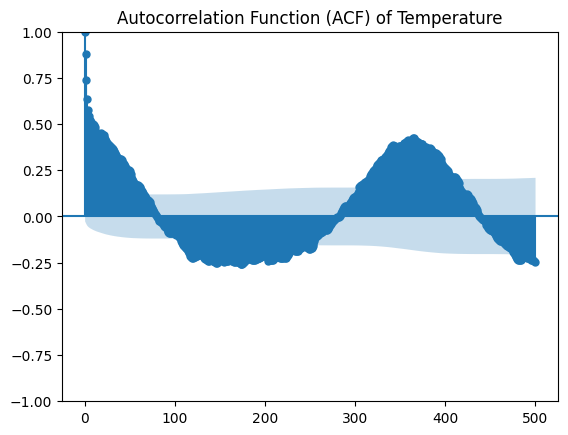

In [ ]:
# Plot ACF
plt.figure(figsize=(10,5))
plot_acf(df["TEMPERATURA"], lags=500)  # Adjust lags as needed
plt.title("Autocorrelation Function (ACF) of Temperature for Belo Horizonte")
plt.show()